In [1]:
#import libraries
from fastai.vision.all import *
from fastai.distributed import *
from google.colab import drive
import zipfile
import pandas as pd
from fastai.vision.widgets import *

In [2]:
# mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# list files in the mounted GDrive folder
!ls "/content/drive/My Drive/techlabs"

 classifier_working.ipynb			   'image caption notes.docx'
 coco_training.ipynb				    image_labels_2.csv
'Copy of classifier_working.ipynb'		    image_labels.csv
'Copy of OpenAI CLIP simple implementation.ipynb'   image_labels.gsheet
'github token.txt'				    images
'git pull request lines.txt'			    scraping.py


In [14]:
# copy the csv file containing the label dataset
!cp -av "/content/drive/My Drive/techlabs/image_labels_2.csv" "image_labels.csv"

'/content/drive/My Drive/techlabs/image_labels_2.csv' -> 'image_labels.csv'


In [5]:
# copy all images and store them in the 'images' folder
!cp -av "/content/drive/My Drive/techlabs/images" "images"

'/content/drive/My Drive/techlabs/images' -> 'images'
'/content/drive/My Drive/techlabs/images/1.jpg' -> 'images/1.jpg'
'/content/drive/My Drive/techlabs/images/2.jpg' -> 'images/2.jpg'
'/content/drive/My Drive/techlabs/images/3.jpg' -> 'images/3.jpg'
'/content/drive/My Drive/techlabs/images/4.jpg' -> 'images/4.jpg'
'/content/drive/My Drive/techlabs/images/5.jpg' -> 'images/5.jpg'
'/content/drive/My Drive/techlabs/images/6.jpg' -> 'images/6.jpg'
'/content/drive/My Drive/techlabs/images/7.jpg' -> 'images/7.jpg'
'/content/drive/My Drive/techlabs/images/8.jpg' -> 'images/8.jpg'
'/content/drive/My Drive/techlabs/images/9.jpg' -> 'images/9.jpg'
'/content/drive/My Drive/techlabs/images/10.jpg' -> 'images/10.jpg'
'/content/drive/My Drive/techlabs/images/11.jpg' -> 'images/11.jpg'
'/content/drive/My Drive/techlabs/images/12.jpg' -> 'images/12.jpg'
'/content/drive/My Drive/techlabs/images/13.jpg' -> 'images/13.jpg'
'/content/drive/My Drive/techlabs/images/14.jpg' -> 'images/14.jpg'
'/content/dr

In [15]:
# read label dataset
labels = pd.read_csv('image_labels.csv')
labels.head(), labels.tail()

(  image_id  label
 0        1    art
 1        2    art
 2        3  dirty
 3        4    art
 4        5    art,       image_id  label
 861  dirty_165  dirty
 862  dirty_177  dirty
 863  dirty_182  dirty
 864  dirty_191  dirty
 865  dirty_199  dirty)

In [16]:
# add extension to the image name strings
labels['image_id'] = [(str(o).strip() + '.jpg') for o in labels['image_id']]

In [17]:
# drop rows without labels
labels.dropna(axis = 0, inplace = True)

In [18]:
labels

,image_id,label
0,1.jpg,art
1,2.jpg,art
2,3.jpg,dirty
3,4.jpg,art
4,5.jpg,art
...,...,...
861,dirty_165.jpg,dirty
862,dirty_177.jpg,dirty
863,dirty_182.jpg,dirty
864,dirty_191.jpg,dirty


In [19]:
# DataBlock object.
boxes = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(),
                   get_x=ColReader(0,  pref='/content/images/'),
                   get_y=ColReader(1),
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.90))

In [20]:
# create a DataLoaders object
dls = boxes.dataloaders(labels)

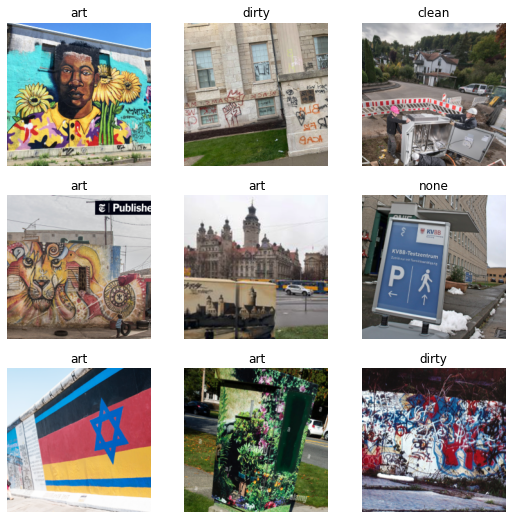

In [21]:
# see a sample batch of images with labels
dls.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

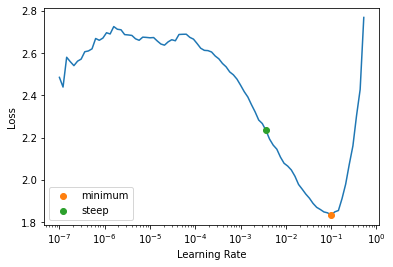

In [22]:
# learning rate finder
learn = cnn_learner(dls, resnet18, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [23]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 3.63e-03


In [24]:
lr_steep

0.00363078061491251

In [25]:
learn.fine_tune(10, base_lr=lr_steep, cbs=SaveModelCallback(every_epoch=2))

epoch,train_loss,valid_loss,error_rate,time
0,2.255950,2.090498,0.452941,00:24


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.224860,1.195093,0.300000,00:24
1,1.038352,1.067083,0.317647,00:24
2,0.865504,1.142690,0.264706,00:24
3,0.702656,1.315993,0.264706,00:24
4,0.591222,1.331419,0.252941,00:25
5,0.491056,1.354269,0.258824,00:24
6,0.417967,1.401595,0.264706,00:24
7,0.349155,1.374560,0.270588,00:24
8,0.302367,1.344773,0.276471,00:24
9,0.262064,1.352842,0.276471,00:24


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

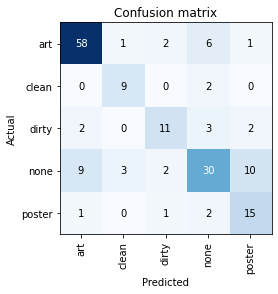

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [27]:
# most confused classes
interp.most_confused()

[('none', 'poster', 10),
 ('none', 'art', 9),
 ('art', 'none', 6),
 ('dirty', 'none', 3),
 ('none', 'clean', 3),
 ('art', 'dirty', 2),
 ('clean', 'none', 2),
 ('dirty', 'art', 2),
 ('dirty', 'poster', 2),
 ('none', 'dirty', 2),
 ('poster', 'none', 2),
 ('art', 'clean', 1),
 ('art', 'poster', 1),
 ('poster', 'art', 1),
 ('poster', 'dirty', 1)]

In [28]:
# I re-wrote ImagesCleaner class, which is the base of ImageClassifierCleaner()
## ImageClassifierCleaner failed for this project, because its function set_fns() needs to be fed
## paths to every image, but my DataLoaders uses only the names of the images not the paths

def get_top_losses(classifier, ds_idx = 0):
  '''
  input: ds_idx 0 for training set, 1 for valid set
  '''
  # set dl as the chosen dataloader, either training or valid
  dl = classifier.dls[ds_idx].new(shuffle=False, drop_last=False)

  #use the classifier to get predictions
  probs,targs,preds,losses = classifier.get_preds(dl=dl, with_input=False, with_loss=True, with_decoded=True)
  
  # make a copy of the dataloaders 
  table_dl = dl.dataset.items.copy()

  #add a column of losses 
  table_dl.loc[:, 'losses']= losses

  # sort losses before returning table
  return table_dl.sort_values(by = ['losses'], ascending=False)


In [29]:
top_losses = get_top_losses(learn, ds_idx = 0)
top_losses.head(25)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


,image_id,label,losses
139,140.jpg,art,9.001438
307,311.jpg,none,4.016883
813,poster_100.jpg,poster,1.534817
86,87.jpg,art,1.323280
66,67.jpg,none,1.124152
212,213.jpg,art,1.121506
427,art_8.jpg,art,1.050256
511,art_103.jpg,art,1.039632
802,poster_80.jpg,poster,0.873584
69,70.jpg,none,0.825488


In [30]:
learn.export()

In [31]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [32]:
# load model
learn_inf = load_learner(path/'export.pkl')

In [33]:
learn_inf.dls.vocab

['art', 'clean', 'dirty', 'none', 'poster']

In [36]:
#file upload button
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [40]:
# assign the uploaded image to variable 'img'
img = PILImage.create(btn_upload.data[-1])

In [41]:
# output uploaded image
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [42]:
#predict
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: dirty; Probability: 0.8861')

In [43]:
btn_run = widgets.Button(description='Classify')

In [44]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])